In [1]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')

from figFcns_nb import *

# O realistickej implementácii riadiaceho systému z cvičenia prvého

Uvažujme riadený systém v tvare
	\begin{equation}
		\dot{x}(t) = a\, x(t) + u(t) \label{sustavaNaCv}
	\end{equation}
	kde $x(t)$ je stavová veličina sytému, $u(t)$ je akčný zásah (výstup) regulátora. Parameter $a$ je neznáma konštanta.    

Funkcia, ktorá realizuje diferenciálnu rovnicu riadeného systému, nech je v tvare:

In [2]:
def fcn_difRovnice_01(x, t, a, u):

    dotx = a*x + u

    return dotx

Nech začiatočný stav riadeného systému je $x(0) = 1$ a nech hodnota parametra $a$ je taká aby riadený systém bol nestabilný. Pridajme k riadenému systému riadiaci systém daný nasledovne:
	\begin{equation}
		u = -k\, x; \qquad \dot{k} = x^2
	\end{equation}


Simulačná schéma, ktorá realizuje numerickú simuláciu riadeného systému pomocou ODE solvera, a zároveň realizuje istú implementáciu daného riadiaceho systému, je nasledovná:

In [3]:
def fcn_simSch_03(t_start, T_s, finalIndex, param_a):

    #-----------------------------------------
    # casovy vektor
    
    t_log = np.zeros([finalIndex, 1])
    t_log[0,:] = t_start
    
    #-----------------------------------------
    # vektor stavu riadeneho systemu

    x_0 = np.array([1])

    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    #-----------------------------------------
    # vektor adaptovaneho parametra

    k_log = np.zeros([finalIndex, 1])

    #-----------------------------------------
    # vektor akcneho zasahu

    u_log = np.zeros([finalIndex, 1])

    #-----------------------------------------

    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        #-------------------------------------
        # Riadeny system - simulacia (pomocou ODEsolvera)

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        odeOut = odeint(fcn_difRovnice_01,
                        x_log[idx-1,:],
                        timespan,
                        args=(param_a, u_log[idx-1,:])
                        )

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]

        #-------------------------------------
        # Riadiaci system:

        # zakon adaptacie:
        deltk = x_log[idx-1,:]*x_log[idx-1,:]

        # adaptovany parameter (numericka integracia - vlastne sumator)
        k_log[idx,:] = k_log[idx-1,:] +  (deltk * T_s)

        # zakon riadenia:
        u_log[idx,:] = -k_log[idx-1,:] * x_log[idx-1,:]

    return [t_log, x_log, u_log, k_log]


Nastavme a spustime simuláciu:

In [4]:
# Nastavenia simulacie
sim_t_start = 0
sim_t_final = 5
sim_T_s = 0.05
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

param_a = 1

# Simulacia
t_log, x_log, u_log, k_log, = fcn_simSch_03(sim_t_start,
                                            sim_T_s,
                                            sim_finalIndex,
                                            param_a,
                                            )

Obrázok, ktorý zobrazuje okrem výstupnej veličiny riadeného systému aj iné veličiny potrebné pre posúdenie stability celého uzavretého regulačného obvodu.

<IPython.core.display.Javascript object>


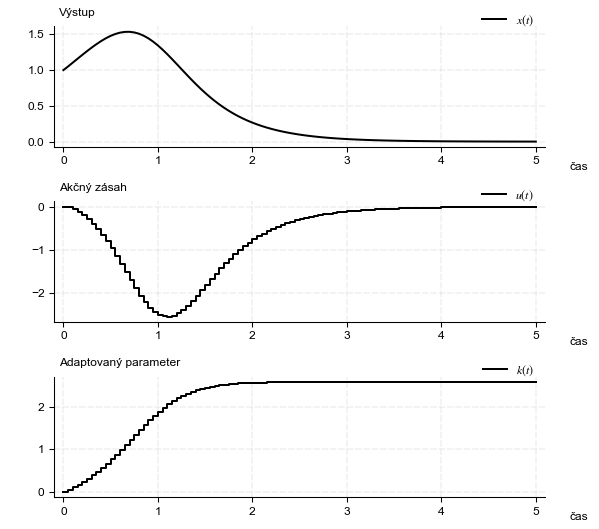

In [5]:
# Obrazok
execfile('misc/figsc_04_nb.py')